In [22]:
#utilities
import re
import pickle
import numpy as np
import pandas as pd
#plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#nltk
from nltk.stem import WordNetLemmatizer
#sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

## Importing and cleaning data

In [23]:
#removing encoding and naming columns
data_columns = ['sentiment','ids','date','flag','user','text']
data_encoding = 'ISO-8859-1'
dataset = pd.read_csv('../../../../../Downloads/training.1600000.processed.noemoticon.csv',encoding=data_encoding,names=data_columns)

In [42]:
dataset.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [43]:
dataset.describe

<bound method NDFrame.describe of          sentiment                                               text
0                0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1                0  is upset that he can't update his Facebook by ...
2                0  @Kenichan I dived many times for the ball. Man...
3                0    my whole body feels itchy and like its on fire 
4                0  @nationwideclass no, it's not behaving at all....
...            ...                                                ...
1599995          1  Just woke up. Having no school is the best fee...
1599996          1  TheWDB.com - Very cool to hear old Walt interv...
1599997          1  Are you ready for your MoJo Makeover? Ask me f...
1599998          1  Happy 38th Birthday to my boo of alll time!!! ...
1599999          1  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]>

In [45]:
dataset.sentiment.value_counts()

1    800000
0    800000
Name: sentiment, dtype: int64

In [24]:
#removing undesired columns
dataset = dataset[['sentiment','text']]
#replacing 4 with 1 for easier understanding
dataset['sentiment'] = dataset['sentiment'].replace(4,1)


In [25]:
# for index, row in dataset.iterrows():
#     for word in row['text']:
#         if any(word in row['text'] for word in search_terms):
#             dataset.drop(index, inplace=True, axis=1)

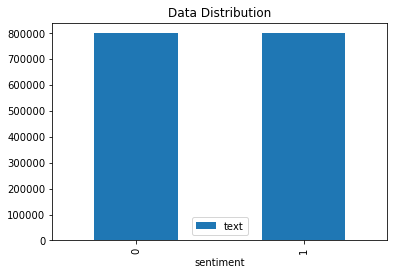

In [26]:
ax = dataset.groupby('sentiment').count().plot(kind='bar',title='Data Distribution')


In [27]:
#seperating text and sentiment into itterable list
text, sentiment = list(dataset['text']),list(dataset['sentiment'])            

In [59]:
indexes = []
for tweet in dataset['text']:
    tweet = tweet.lower()
    for word in tweet:
        if word in tweet for word in search_terms:
            x = dataset.index[word]
            indexes.append(x)

In [60]:
#indexes

In [32]:
r = dataset['text']
r

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [28]:
#replacing emojis with text equivelent
emojis = {':)':'smile',':-)':'smile',':d':'wink',':-E':'vampire',':(':'sad',':-(': 'sad', ':-<': 'sad',
          ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}


#creating more robust stopwords list
stop_word_list = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

#creating list of words to search for to pair down dataset for joining

search_terms = ['ipad', 'apple','iphone','google','android','mac','windows']



In [62]:
def preprocess(textdata):
    #empty list to return after processing is done
    processed_text = []
    
    #instance of lemmatizer
    word_lemmatizer = WordNetLemmatizer()
    
    #regex patterns
    url_pattern = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
    user_pattern = '@[^\s]+'
    alpha_numeric_pattern = '[^a-zA-Z0-9]'
    repeating_character_pattern = r'(.)\1\1+'
    replace_repeat_char = 'r\1\1'
    
    #looping through eacg tweet
    for tweet in textdata:
        
        #making the tweet lower case
        tweet = tweet.lower()
        
        #replacing all emojis
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, 'EMOJI'+emojis[emoji])
        
        #replacing all urls
        tweet = re.sub(url_pattern, 'URL',tweet)
        
        #replacing all usernames
        tweet = re.sub(user_pattern, 'USER',tweet)
        
        #replacing all non alphanumeric values
        tweet = re.sub(alpha_numeric_pattern, ' ', tweet)
        
        #replace all repeating characters
        tweet  = re.sub(repeating_character_pattern, replace_repeat_char, tweet)
        
        tweet_words = ''
        for word in tweet.split():
            if word not in stop_word_list:
                if len(word)>1:
                    word = word_lemmatizer.lemmatize(word)
                    tweet_words += (word+' ')
        processed_text.append(tweet_words)
    return processed_text

In [63]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken:{round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken:169 seconds


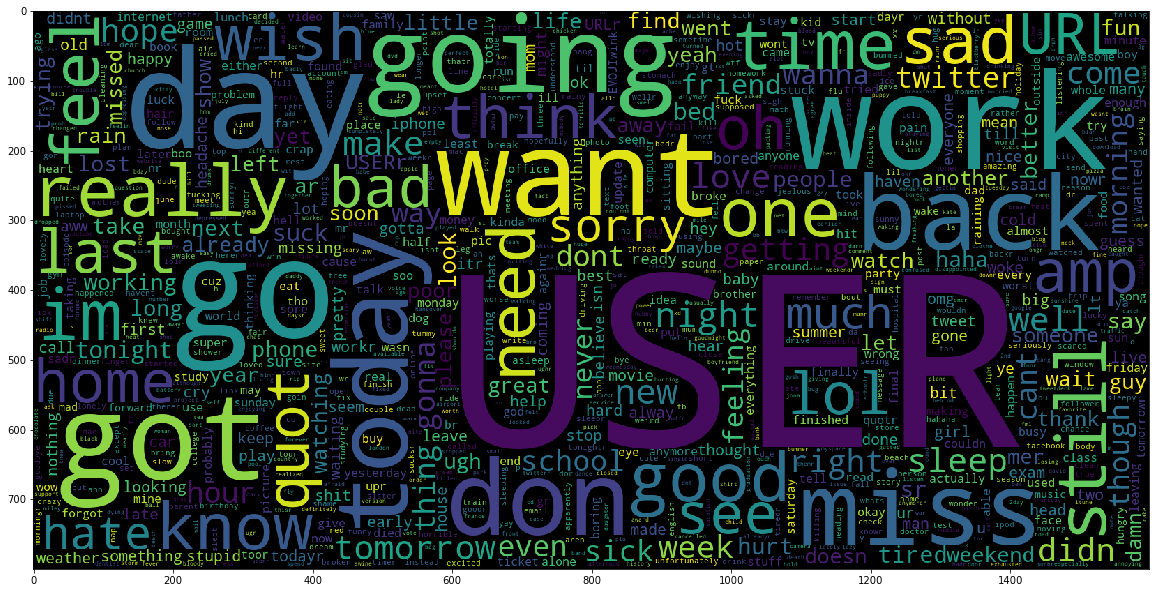

In [64]:
data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)